In [1]:
import logging
import random

import matplotlib as mpl
from nbmetalog import nbmetalog as nbm
import seaborn as sns
from tqdm import tqdm

from hsurf.hsurf import tilted_algo as tilted_algo
from hsurf import site_selection_strategy
import pylib

random.seed(1)

logging.basicConfig(
    format="[%(funcName)s:%(lineno)d] %(message)s",
)
logger = logging.getLogger()

pylib.jupyter_hide_toggle(hide=True)


/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_check_testing_requirements.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/pandera/__init__.py:40: UserWarning: Pandas and numpy have been removed from the base pandera
dependencies. Please install pandas as part of your environment's
dependencies or install the pandas extra with:

```bash
pip install pandas pandera

# or
pip install 'pandera[pandas]'
```

  warnings.warn(_warning_msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/alifedata_phyloinformatics_convert/_impl/phytrack_Systematcs.py:7: UserWarning: ImportWarning: phylotrackpy.Systematics import failed; inserting a no-op mock for Systematics. This is likely because phylotrackpy is not installed.
  w

<IPython.core.display.Javascript object>

In [2]:
nbm.print_metadata()

pylib.jupyter_hide_toggle(hide=True)


context: ci
hostname: fv-az1118-643
interpreter: 3.10.12 (main, May 27 2025, 17:12:29) [GCC 11.4.0]
nbcellexec: null
nbname: 20a-tilted-eulerian-surface
nbpath: /home/runner/work/hstrat-surface-concept/hstrat-surface-concept/binder/20a-tilted-eulerian-surface.ipynb
revision: null
session: f2cf34bc-6cfc-4a96-bfa2-aaedd0b6bb90
timestamp: 2025-07-04T06:48:42Z00:00


IPython==7.31.1
keyname==0.6.0
yaml==6.0.2
hsurf==1.0.2
logging==0.5.1.2
matplotlib==3.8.3
nbmetalog==0.2.6
seaborn==0.13.2
re==2.2.1
comm==0.2.2
psutil==7.0.0
zmq==27.0.0
json==2.0.9
ipykernel==6.29.5


<IPython.core.display.Javascript object>

## Visualize Tilted Criterion Satisfaction


In [3]:
mpl.rcParams.update(
    {
        "figure.figsize": (6, 1.5),
        "font.family": "serif",
    },
)


100%|██████████| 255/255 [00:00<00:00, 5686.06it/s]


teeplots/20a/hue=kind+surface-size=8+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.pdf
teeplots/20a/hue=kind+surface-size=8+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.png


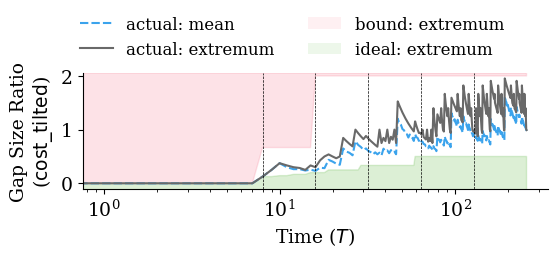

100%|██████████| 65535/65535 [00:11<00:00, 5616.29it/s]


teeplots/20a/hue=kind+surface-size=16+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.pdf
teeplots/20a/hue=kind+surface-size=16+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.png


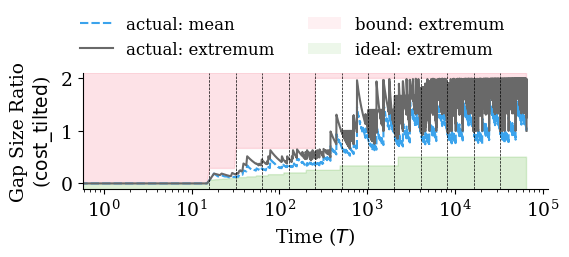

100%|██████████| 65536/65536 [00:11<00:00, 5644.73it/s]


teeplots/20a/hue=kind+surface-size=32+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.pdf
teeplots/20a/hue=kind+surface-size=32+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.png


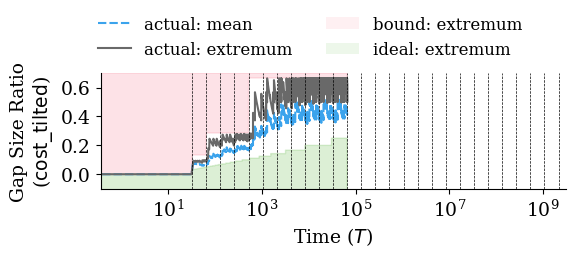

In [4]:
for surface_size in 8, 16, 32:
    surface_history_df = pylib.site_selection_eval.make_surface_history_df(
        tilted_algo.pick_ingest_site,
        surface_size=surface_size,
        num_generations=min(2**surface_size - 1, 2**16),
        progress_wrap=tqdm,
    )
    criteria_df = pylib.site_selection_eval.calc_surface_history_criteria(
        surface_history_df,
        tilted_algo,
        site_selection_strategy.site_selection_bounds,
        site_selection_strategy.site_selection_criteria,
        enforce_tilted_bound=True,
        progress_wrap=tqdm,
    )
    with pylib.teed_release(
        pylib.site_selection_viz.criterion_satisfaction_lineplot,
        data=criteria_df[
            ~criteria_df["kind"].isin(["naive lower bound"])
        ],
        x="rank",
        y="tilted criterion",
        hue="kind",
        surface_size=surface_size,
        teeplot_outinclude="surface_size",
        teeplot_subdir="20a",
    ) as ax:
        sns.move_legend(
            ax, "lower center",
            bbox_to_anchor=(.45, 1),
            ncol=2,
            title=None,
            frameon=False,
            fontsize="large",
        )
        ax.set_xlabel("Time ($T$)")
        ax.set_ylabel("Gap Size Ratio\n($\\mathsf{cost\_tilted}$)")
